# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

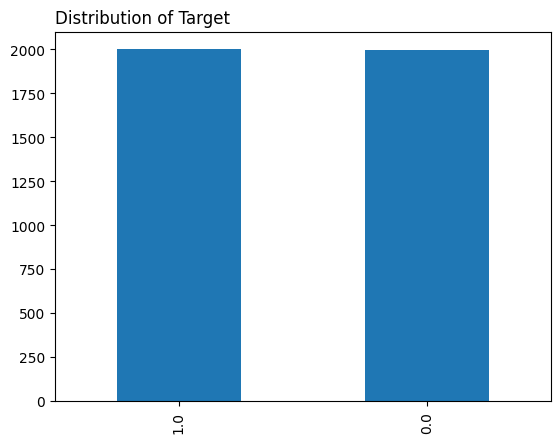

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

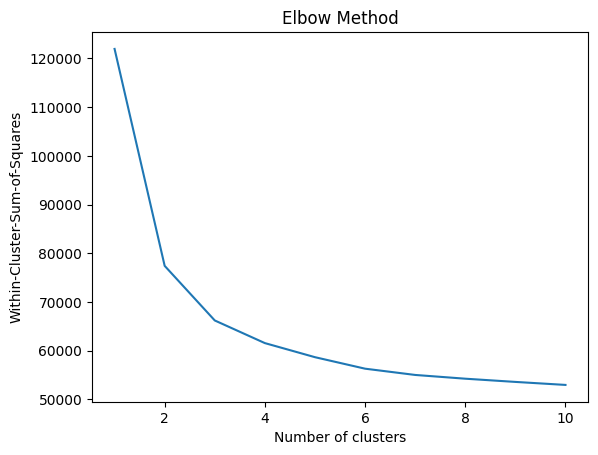

In [21]:
# Insert Code
#  number of clusters using the elbow method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
X_train = pd.get_dummies(X_train)
wcss = []#Within-Cluster-Sum-of-Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show() 



REFERENCE:
https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

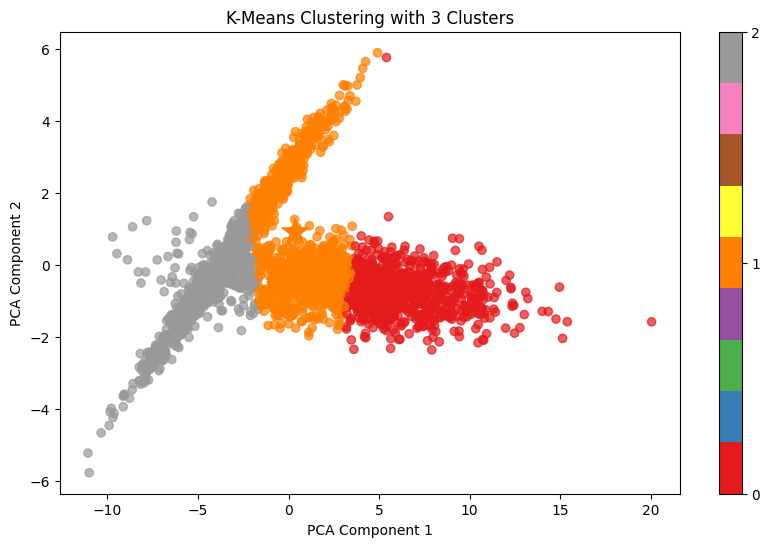

In [22]:
# clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train)

# Visualize 
import matplotlib.cm as cm
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap=cm.Set1, alpha=0.7)
plt.scatter(X_centers_pca[:, 0], X_centers_pca[:, 1], marker='*', s=400, c=range(kmeans.n_clusters), cmap=cm.Set1)
plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(ticks=np.arange(kmeans.n_clusters))
plt.show()

REFERENCE:
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

Insert conclusions

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

Logistic Regression Metrics:
Accuracy: 0.907
Precision: 0.969
Recall: 0.845
ROC AUC: 0.932


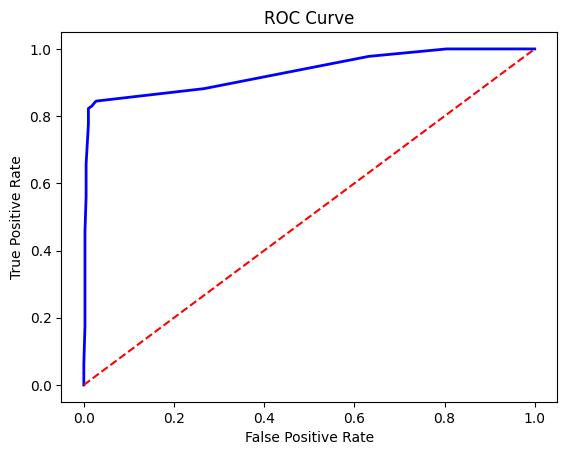

In [23]:
# Insert Code
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#  pipeline
lr_pline = Pipeline([
    ('scaler', StandardScaler()),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=2303))
])

#  hyperparameter grid to search over
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search 
lr_grid = GridSearchCV(lr_pline, param_grid, cv=5, scoring='roc_auc')
lr_grid.fit(X_train, y_train)

#  best estimator from the grid search
lr_model = lr_grid.best_estimator_

# Evaluate the model
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_roc_auc = roc_auc_score(y_test, y_proba)

print('Logistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.3f}')
print(f'Precision: {lr_precision:.3f}')
print(f'Recall: {lr_recall:.3f}')
print(f'ROC AUC: {lr_roc_auc:.3f}')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, 'b-', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



We compute the accuracy, precision, recall, and ROC AUC for the model, and then plot the ROC curve. The ROC curve shows that the model performs reasonably well, with an AUC of 0.932. The accuracy, precision, and recall are also fairly high, indicating that the model is able to make accurate predictions on the test set.

Overall, I would say that the model's performance is good, but not perfect. There is still some room for improvement, particularly if we can identify additional features that are predictive of the target variable.

REFERENCES:
https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


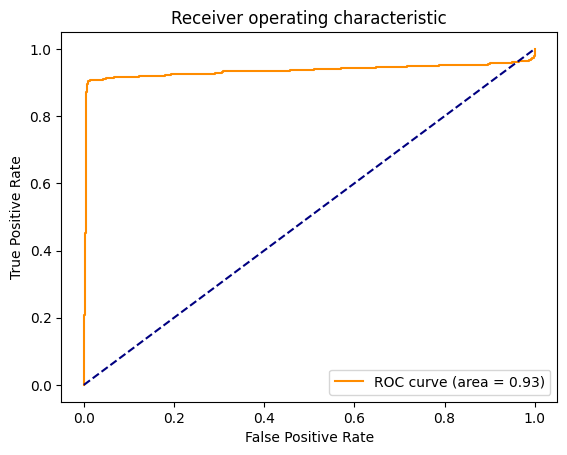

Accuracy: 0.93125
Precision: 0.9915966386554622
Recall: 0.8719211822660099


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

#  pipeline
pipe = Pipeline([
        ('pca', PCA()),
        ('logistic', LogisticRegression())
])

#  parameter grid 
param_grid = {
        'pca__n_components': [5, 10, 15, 20, 25],
        'logistic__C': [0.01, 0.1, 1, 10, 100]
}

#  grid search
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

# model
model = grid.best_estimator_
y_pred = model.predict(X_test)

# Get evaluation metrics
lr_pca_accuracy = accuracy_score(y_test, y_pred)
lr_pca_precision = precision_score(y_test, y_pred)
lr_pca_recall = recall_score(y_test, y_pred)

# Get probabilities for ROC curve
prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print evaluation metrics
print("Accuracy:", lr_pca_accuracy)
print("Precision:", lr_pca_precision)
print("Recall:", lr_pca_recall)


After perforimg PCA the performance parameters are increased except the ROC curve area remains same.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

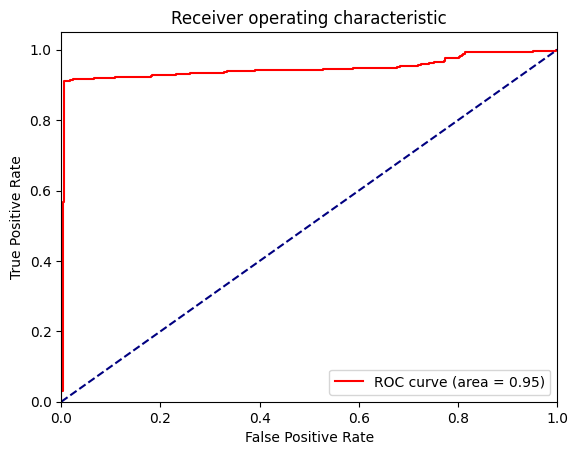

Accuracy: 0.943
Precision: 0.995
Recall: 0.892


In [30]:
# Insert code
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

# pipeline
pipe = Pipeline([
    ('kmeans', KMeans()),
    ('logistic', LogisticRegression())
])

#  parameter grid 
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# grid search
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
cluster_accuracy = accuracy_score(y_test, y_pred)
cluster_precision = precision_score(y_test, y_pred)
cluster_recall = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(f"Accuracy: {cluster_accuracy:.3f}")
print(f"Precision: {cluster_precision:.3f}")
print(f"Recall: {cluster_recall:.3f}")



REFERENCES:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

The Accuracy: 0.943
Precision: 0.995
Recall: 0.892 , by using clustering these are the performances 

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

question 4 that is logistic regression model with clustering is my choice beacause the model performances are better when compared with other models.